In [1]:
import numpy as np
import numpy.ma as ma
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.patches as mpatches
from mpl_toolkits.basemap import Basemap
from numpy.fft import fft, fftfreq, ifft
import pandas as pd

from scipy.fftpack import *
#import cartopy.crs as ccrs
#import cartopy.feature as cfeature

from scipy import signal
from eofs.standard import Eof

plt.rcParams['font.family'] = 'deJavu Sans'
plt.rcParams['font.size'] = 20 #22

In [2]:
dataexcel=pd.read_excel('D:/EOF/EOF_FINAL/FFT ENSO DAN DMI/KORELASI DMI_PRINCETON/PRINCETON_DMI.xlsx')

In [3]:
dataexcel

,Tahun,Bulan,DMI
0,1948,1,-0.298
1,1948,2,-0.155
2,1948,3,0.024
3,1948,4,-0.103
4,1948,5,-0.085
...,...,...,...
823,2016,8,-0.444
824,2016,9,-0.437
825,2016,10,-0.372
826,2016,11,-0.382


In [4]:
dataexcel.DMI

0     -0.298
1     -0.155
2      0.024
3     -0.103
4     -0.085
       ...  
823   -0.444
824   -0.437
825   -0.372
826   -0.382
827   -0.310
Name: DMI, Length: 828, dtype: float64

In [5]:
dataexcel.DMI
xxx=dataexcel.DMI.values.tolist()
xxx

[-0.298,
 -0.155,
 0.024,
 -0.103,
 -0.085,
 0.059,
 -0.268,
 -0.462,
 -0.648,
 -0.292,
 -0.379,
 -0.506,
 0.027,
 0.177,
 -0.121,
 0.165,
 -0.091,
 -0.009,
 -0.009,
 0.011,
 -0.09,
 -0.124,
 -0.396,
 -0.331,
 -0.044,
 -0.554,
 -0.692,
 -0.475,
 -0.309,
 -0.494,
 -0.348,
 -0.22,
 -0.631,
 -0.59,
 -0.227,
 -0.027,
 0.256,
 0.211,
 0.259,
 -0.513,
 -0.138,
 -0.19,
 -0.22,
 0.124,
 -0.005,
 -0.168,
 0.123,
 -0.073,
 -0.069,
 0.08,
 0.126,
 0.073,
 -0.148,
 0.02,
 -0.43,
 -0.463,
 -0.607,
 -0.546,
 -0.171,
 -0.03,
 0.304,
 0.285,
 0.188,
 -0.054,
 0.316,
 -0.113,
 -0.178,
 -0.231,
 -0.24,
 -0.312,
 -0.136,
 -0.119,
 -0.339,
 -0.271,
 -0.162,
 -0.009,
 -0.55,
 -0.504,
 -0.855,
 -0.631,
 -0.718,
 -0.836,
 -0.45,
 -0.053,
 -0.049,
 -0.153,
 0.019,
 -0.044,
 -0.695,
 -0.387,
 -0.439,
 -0.43,
 -0.738,
 -0.73,
 -0.269,
 -0.3,
 -0.101,
 -0.021,
 -0.001,
 -0.3,
 -0.57,
 -0.826,
 -1083.0,
 -0.772,
 -0.803,
 -0.672,
 -0.516,
 -0.151,
 -0.437,
 -0.564,
 -0.197,
 -0.3,
 -0.326,
 -0.465,
 -0.488,
 -0.2

In [6]:
yA=np.nanmean(xxx)
stdsA=np.nanstd(xxx)
df_norm=(xxx-yA)/stdsA

In [7]:
n = 828
# Distance of sampel in month
Lx = 828
x = np.linspace(0,Lx,n)
# Preparation step
## Creates all the necessery frequencies
freqs = fftfreq(n)
# Hanya mengambil sinyal yang positif
mask = freqs > 0
## FFT and Power spectra calculation
#fft_vals = fft(wilA_mean.rr.values)#df_wilA['norm'].to_list())
#fft_vals2 = fft(wilB_mean.rr.values)#df_wilB['norm'].to_list())
#fft_vals3 = fft(wilC_mean.rr.values)#df_wilC['norm'].to_list())

fft_vals_DMI = fft(xxx)
# True Teoritical FFT
fft_teo_DMI= 2.0 * np.abs(fft_vals_DMI/n)

In [8]:
fft_teo_DMI

array([16.28318116, 14.31130911,  9.90817279, 10.10727601, 12.77059994,
        6.68445665,  6.75612567, 10.51298126, 11.85164748, 10.93778624,
        6.04994886, 13.88336616,  8.67046144, 12.28382468,  0.76545162,
        7.12857284,  6.51534443,  7.47698655,  5.92516135,  1.61508004,
       14.59015417,  4.68425879, 12.63617458,  7.194248  , 16.55156541,
       10.4123257 , 10.57611265, 11.65173023,  5.70616066, 15.07569436,
        3.5456266 , 14.4326825 , 15.40584409, 15.73870148, 14.34655619,
        8.10124534, 19.15185621,  5.55686069, 10.98054987,  8.87020525,
       11.19536613, 11.15025953,  3.74101992, 15.55627117,  7.71150974,
       14.74729104,  1.98137291,  9.16514757,  6.78362475,  9.20297614,
        2.83251636,  0.12692192, 10.11891141,  4.35885332,  8.00737036,
        6.94059861, 13.40801142, 11.96927232,  9.82405799,  8.59667999,
        9.47734023, 10.80686437,  5.35907127,  7.56058243, 12.87594323,
       12.25501826, 10.72086631, 12.50898115, 14.21301307, 14.40

(0.0, 50.0)

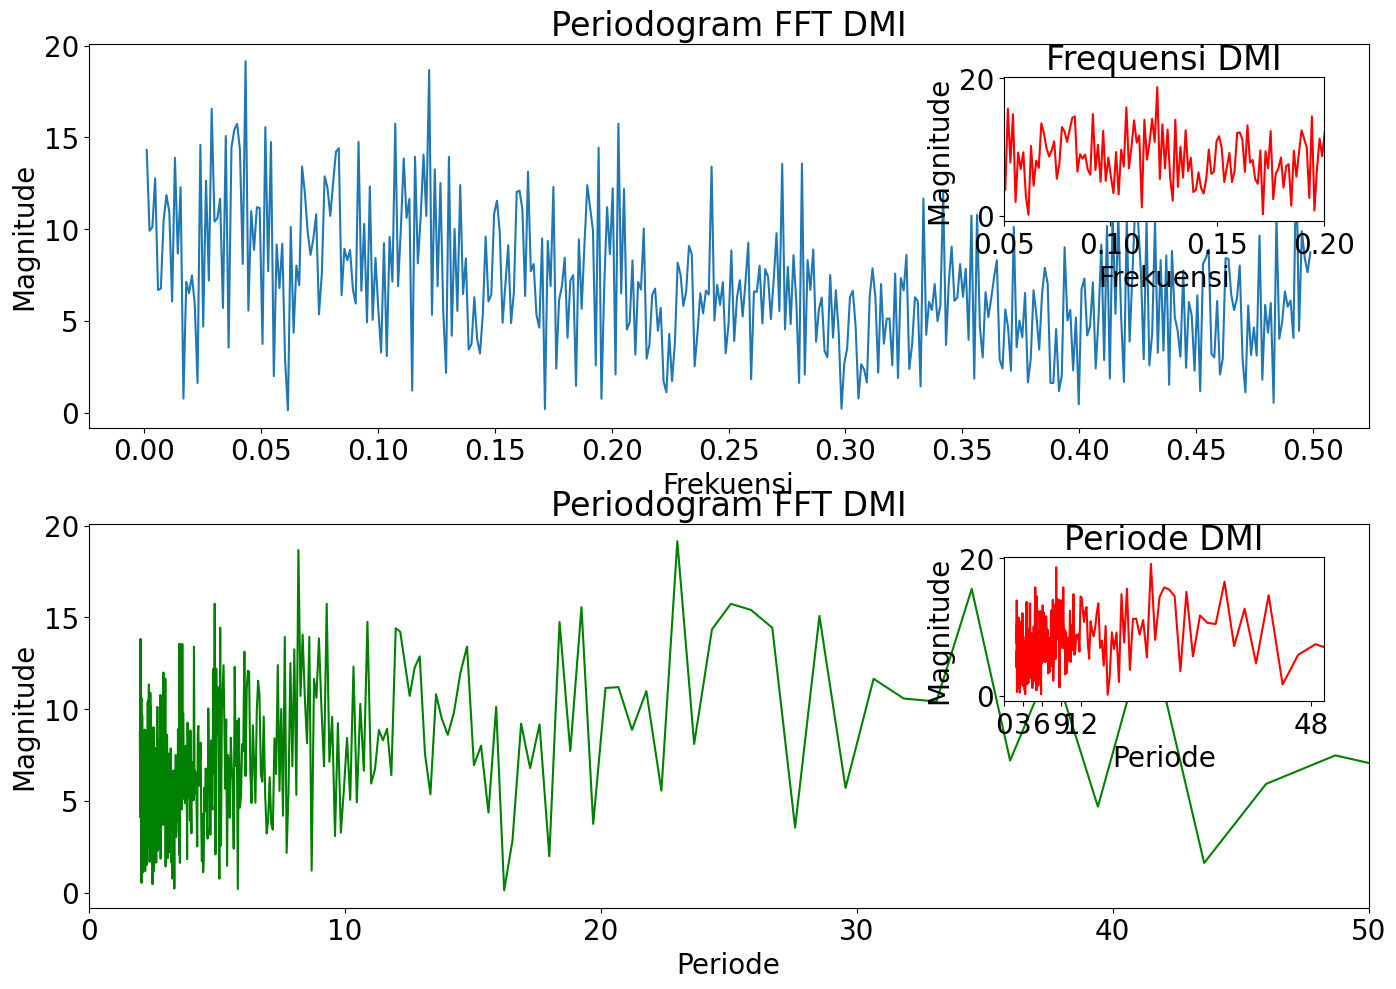

In [9]:
#Plot Periodogram FFT Curah Hujan Sumatera Selatan
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 0.8])
axfch = fig.add_axes([0, 1, 2, 0.8])
axfchk = fig.add_axes([1.43,1.43,0.5,0.3])
axfch2k = fig.add_axes([1.43,0.43,0.5,0.3])
# Frequensi
axfch.plot(freqs[mask], fft_teo_DMI[mask])
axfch.set_xlabel('Frekuensi')
axfch.set_ylabel('Magnitude')
axfch.set_title('Periodogram FFT DMI')
axfch.axis('tight')
axfch.set_xticks([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])
axfchk.plot(freqs[mask], fft_teo_DMI[mask], 'r')
axfchk.set_xlabel('Frekuensi')
axfchk.set_ylabel('Magnitude')
axfchk.set_title('Frequensi DMI')
axfchk.axis('tight')
axfchk.set_xticks([0.05, 0.1, 0.15, 0.2])
axfchk.set_xlim([0.05, 0.2])
# Periode
ax.plot(1/freqs[mask], fft_teo_DMI[mask], 'g')
ax.set_xlabel('Periode')
ax.set_ylabel('Magnitude')
ax.set_title('Periodogram FFT DMI')
ax.axis('tight')
ax.set_xlim([0, 50])
axfch2k.plot(1/freqs[mask], fft_teo_DMI[mask], 'r')
axfch2k.set_xlabel('Periode')
axfch2k.set_ylabel('Magnitude')
axfch2k.set_title('Periode DMI')
axfch2k.set_xticks([0, 3, 6, 9, 12, 48])
axfch2k.axis('tight')
axfch2k.set_xlim([0,50])

In [16]:
import numpy as np
import numpy.ma as ma
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.patches as mpatches
from mpl_toolkits.basemap import Basemap
from numpy.fft import fft, fftfreq, ifft
import pandas as pd

from scipy.fftpack import *
#import cartopy.crs as ccrs
#import cartopy.feature as cfeature

from scipy import signal
from eofs.standard import Eof

plt.rcParams['font.family'] = 'deJavu Sans'
plt.rcParams['font.size'] = 20 #22

In [19]:
ds = xr.open_dataset('D:/EOF/COUNTUR_EOF/EOF_LEMBAB/spesifikhum.nc')
start_TIME='1948'
stop_TIME='2016'
ds

<xarray.Dataset>
Dimensions:      (LON33_65: 33, LAT33_43: 11, LEV8_8: 1, bnds: 2, TIME: 828)
Coordinates:
  * LON33_65     (LON33_65) float64 80.0 82.5 85.0 87.5 ... 155.0 157.5 160.0
  * LAT33_43     (LAT33_43) float64 -10.0 -7.5 -5.0 -2.5 ... 7.5 10.0 12.5 15.0
  * LEV8_8       (LEV8_8) float64 1e+03
  * TIME         (TIME) datetime64[ns] 1948-01-01 1948-02-01 ... 2016-12-01
Dimensions without coordinates: bnds
Data variables:
    LEV8_8_bnds  (LEV8_8, bnds) float64 ...
    TIME_bnds    (TIME, bnds) datetime64[ns] ...
    SHUM         (TIME, LEV8_8, LAT33_43, LON33_65) float32 ...
Attributes:
    history:      FERRET V6.5   9-Sep-23
    Conventions:  CF-1.0

In [20]:
DATA_SHUM=ds.SHUM.values
DATA_SHUM

array([[[[16.066    , 16.119    , 16.35     , ..., 17.284    ,
          17.289001 , 17.196    ],
         [15.466    , 15.684    , 16.028    , ..., 17.09     ,
          17.650002 , 17.471    ],
         [15.450001 , 15.578001 , 15.790001 , ..., 17.293    ,
          17.249    , 16.83     ],
         ...,
         [15.880001 , 16.139    , 15.804001 , ..., 17.515999 ,
          17.536    , 17.55     ],
         [15.646    , 15.579    , 15.054001 , ..., 17.582    ,
          17.374    , 17.163    ],
         [13.708    , 14.243    , 14.253    , ..., 16.823    ,
          16.802    , 16.799    ]]],


       [[[15.916    , 15.965    , 16.116    , ..., 17.393002 ,
          17.458    , 17.23     ],
         [15.378    , 15.674999 , 15.856001 , ..., 17.215    ,
          17.618    , 17.353    ],
         [15.396    , 15.507999 , 15.723    , ..., 17.444    ,
          17.39     , 17.1      ],
         ...,
         [14.101    , 16.161    , 15.452    , ..., 17.228    ,
          16.994    , 1

In [21]:
lat=ds['LAT33_43'][:]
lon=ds['LON33_65'][:]
hgt=ds['SHUM'][:]

hgtx = ma.masked_values(hgt, 1.e20)

wgts   = np.cos(np.deg2rad(lat))
wgts   = wgts.values.reshape(len(wgts), 1)
#solver = Eof(hgt_detrend, weights=wgts)
solver = Eof(hgtx, weights=wgts)
#lat

eof1 = solver.eofs(neofs=10)
pc1  = solver.pcs(npcs=10, pcscaling=0)
varfrac = solver.varianceFraction()
lambdas = solver.eigenvalues()
sum(varfrac[0:3])*100

80.4157657311886

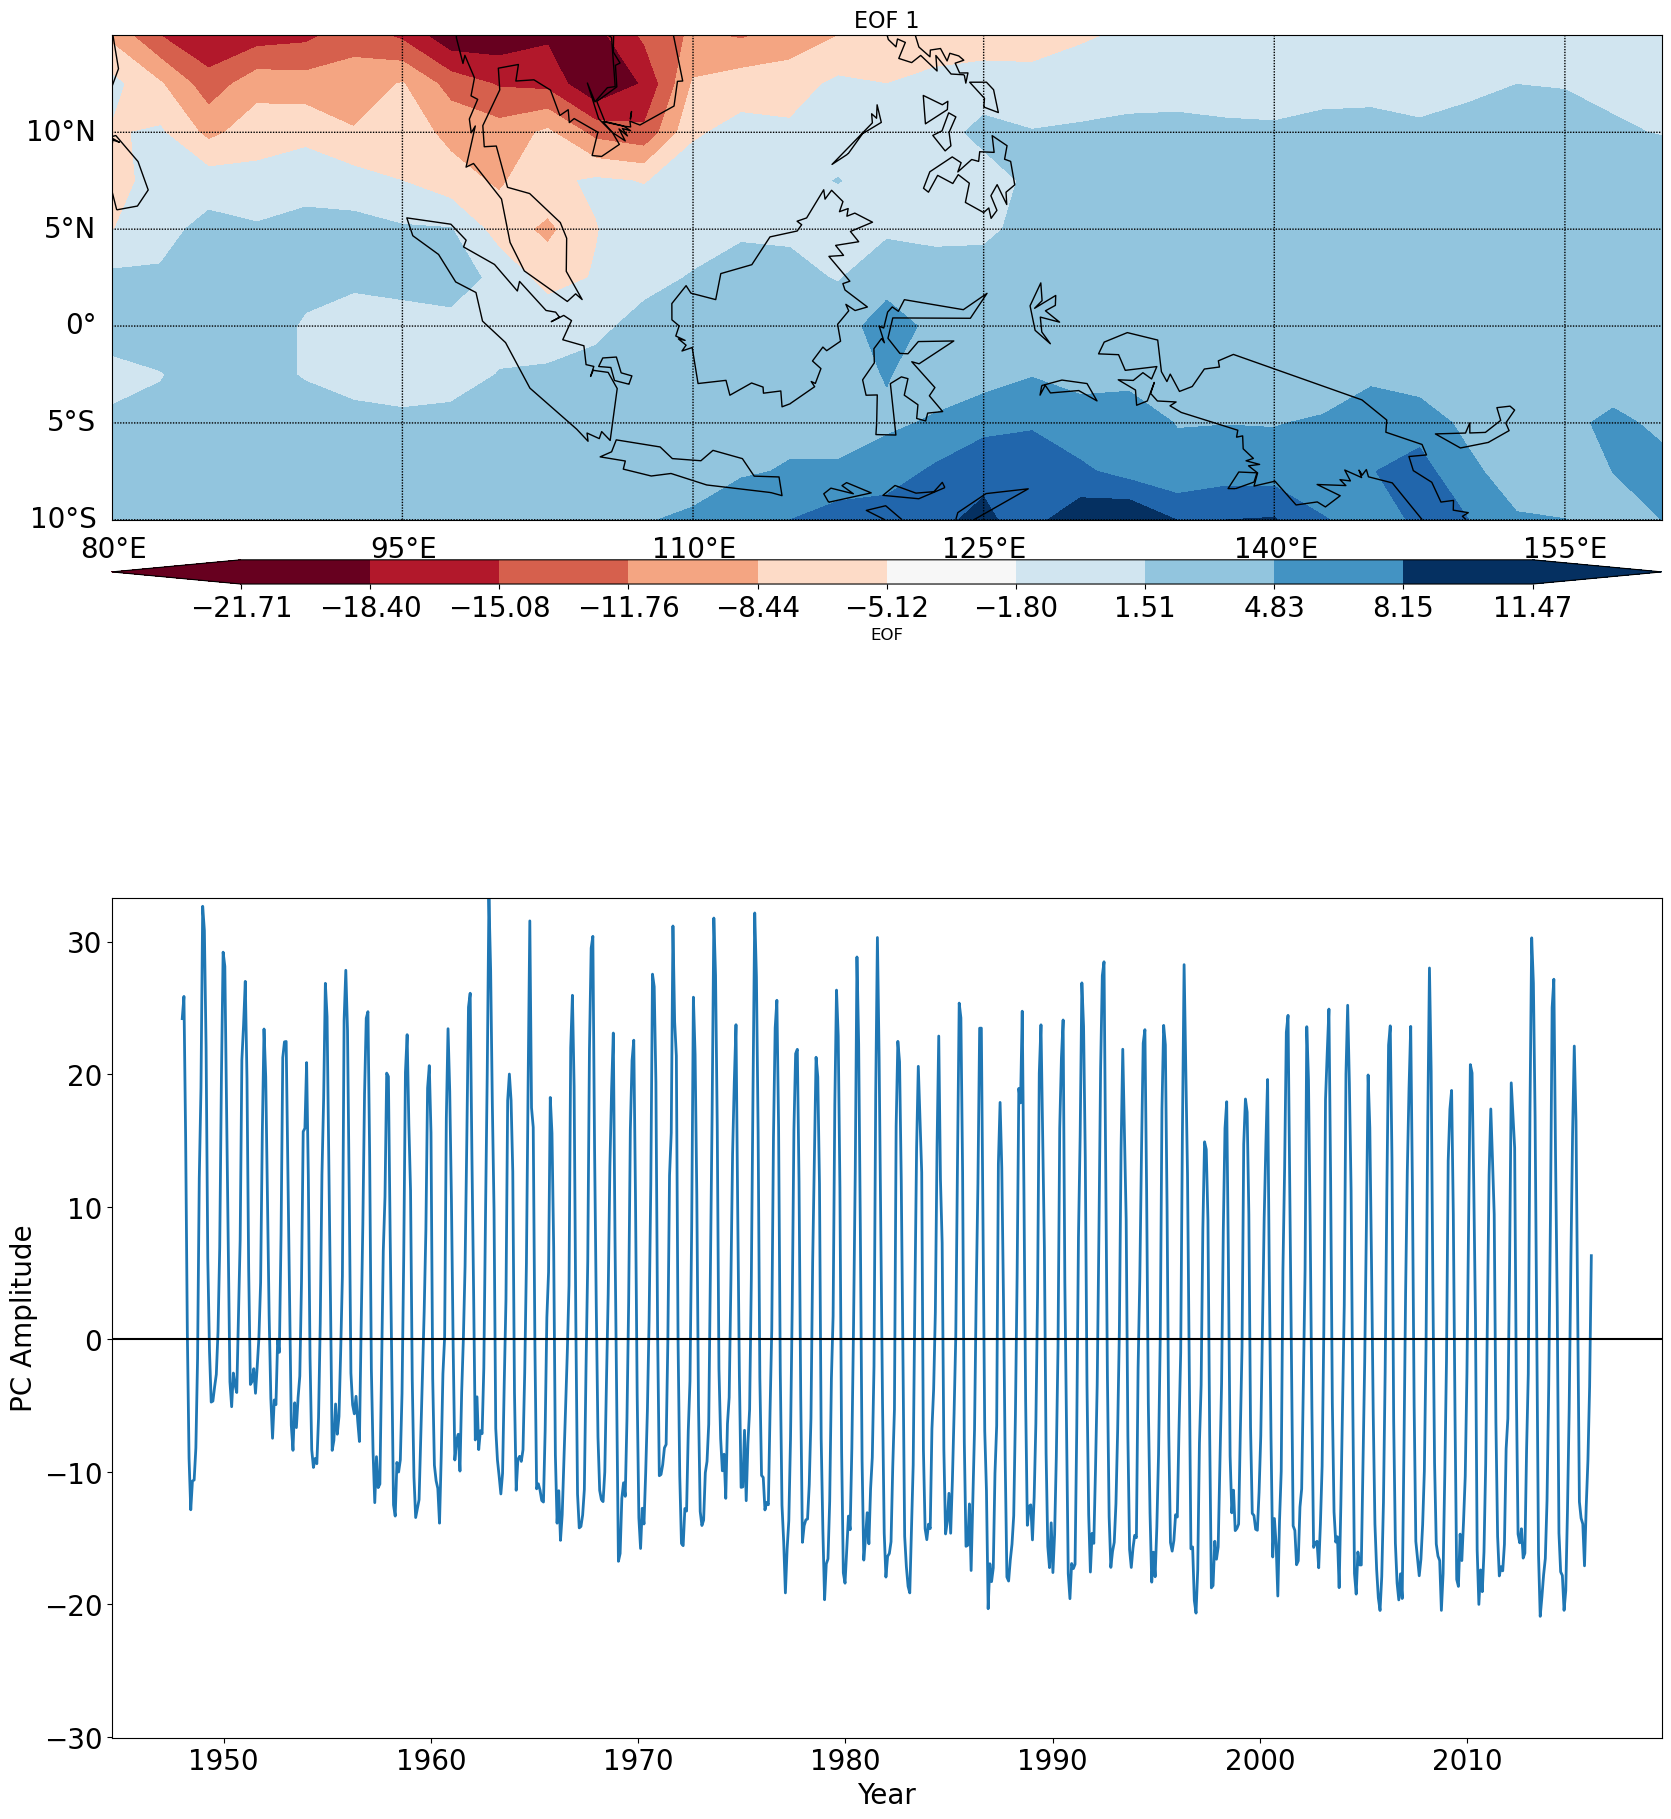

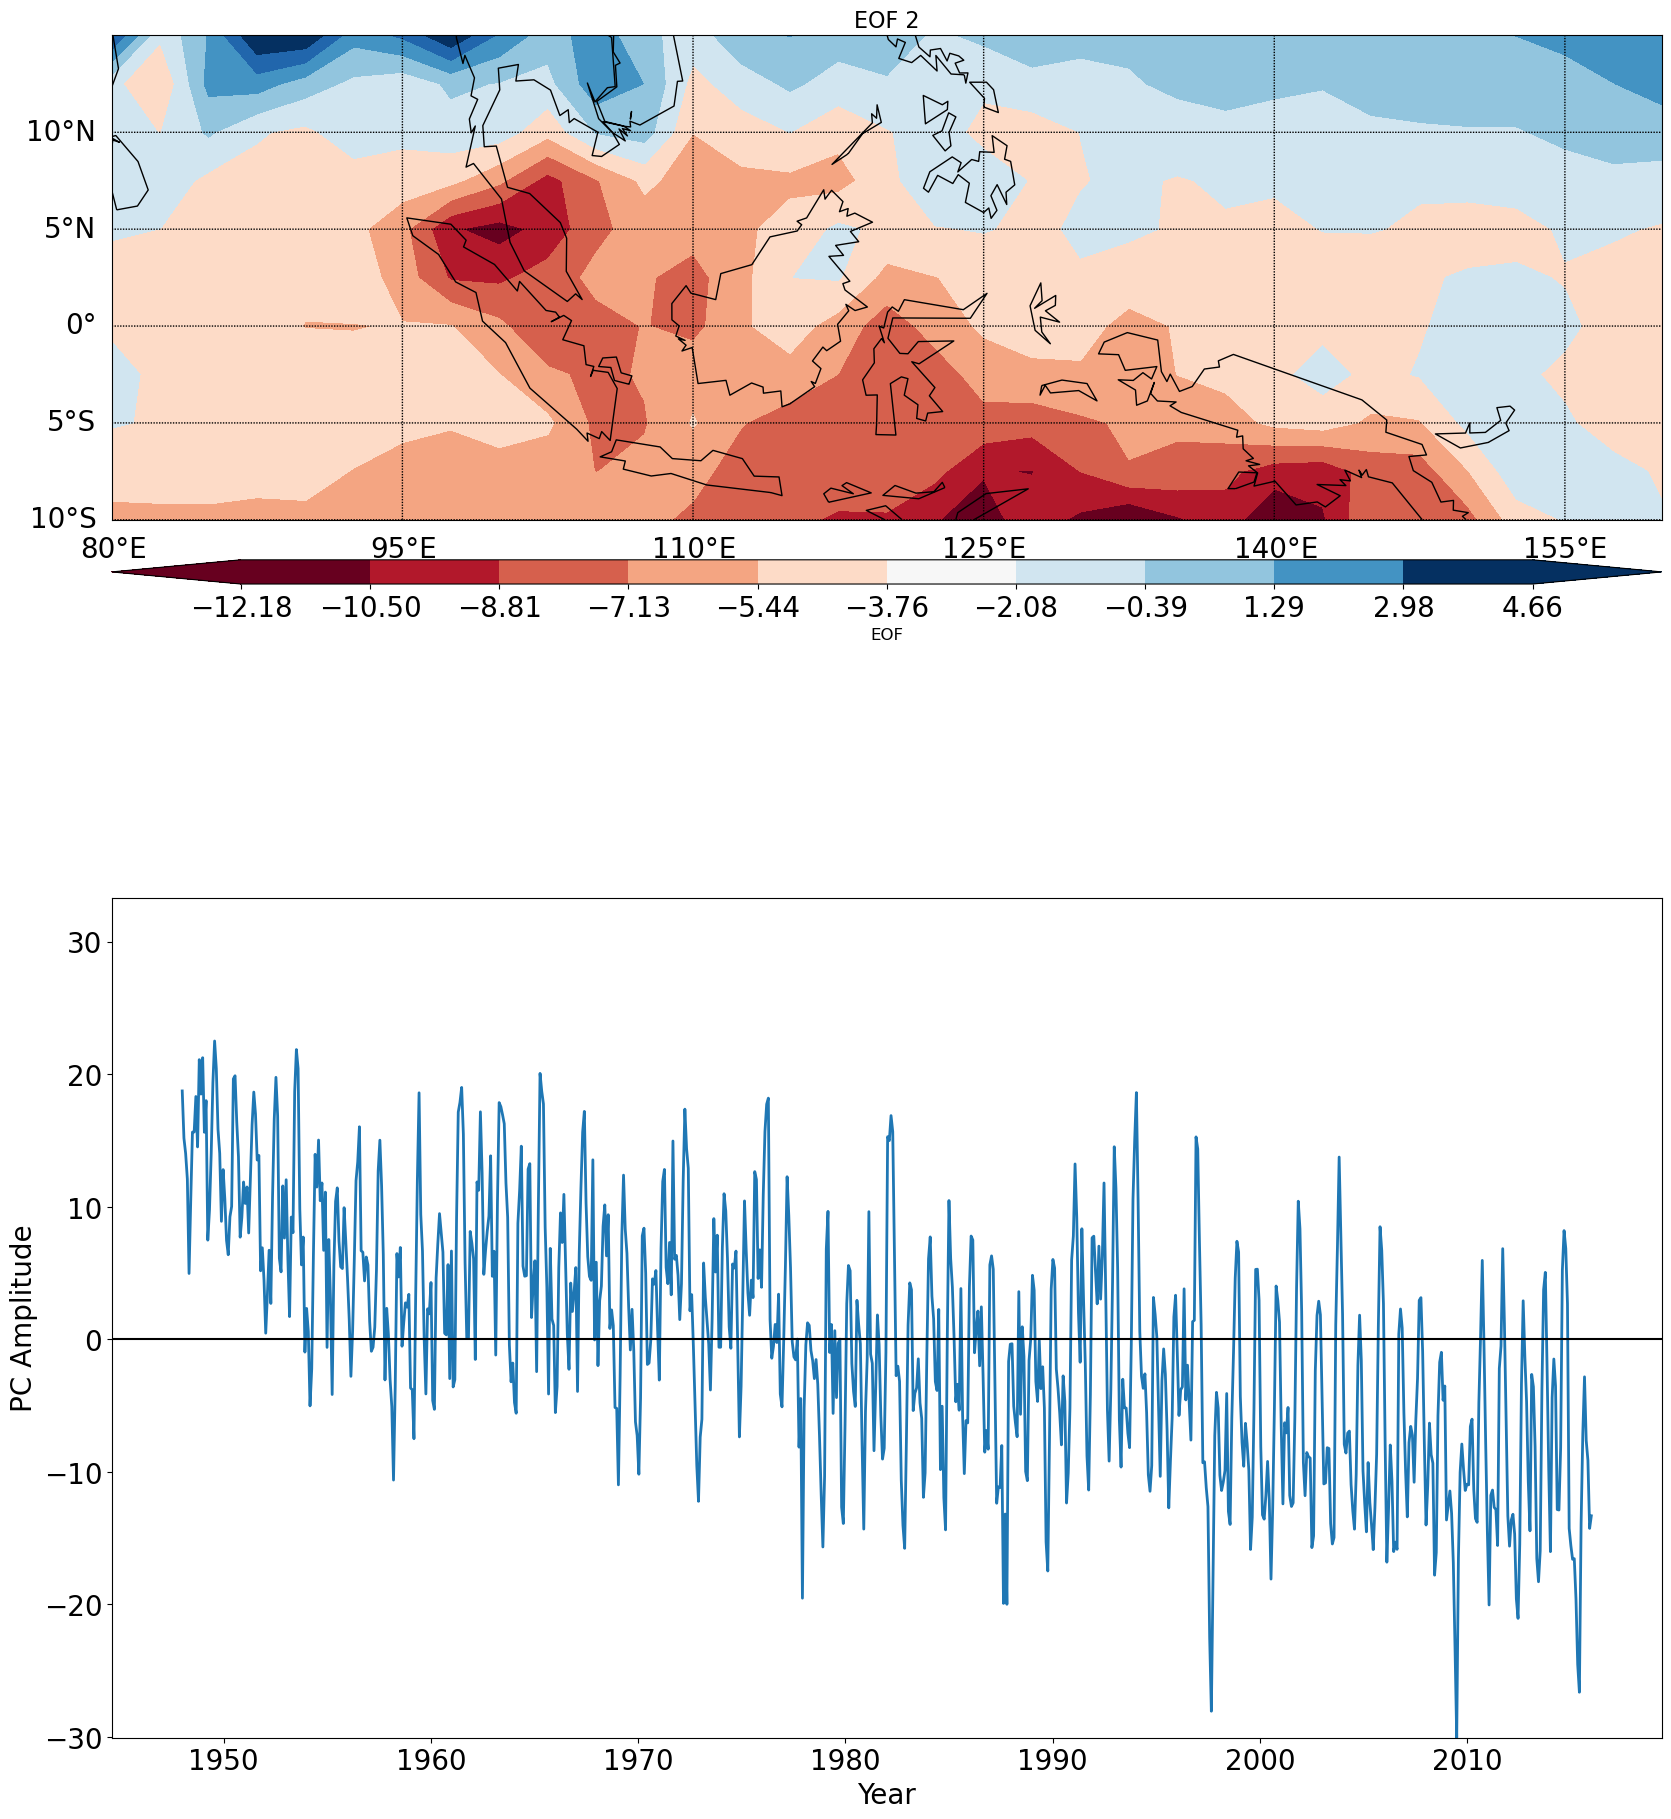

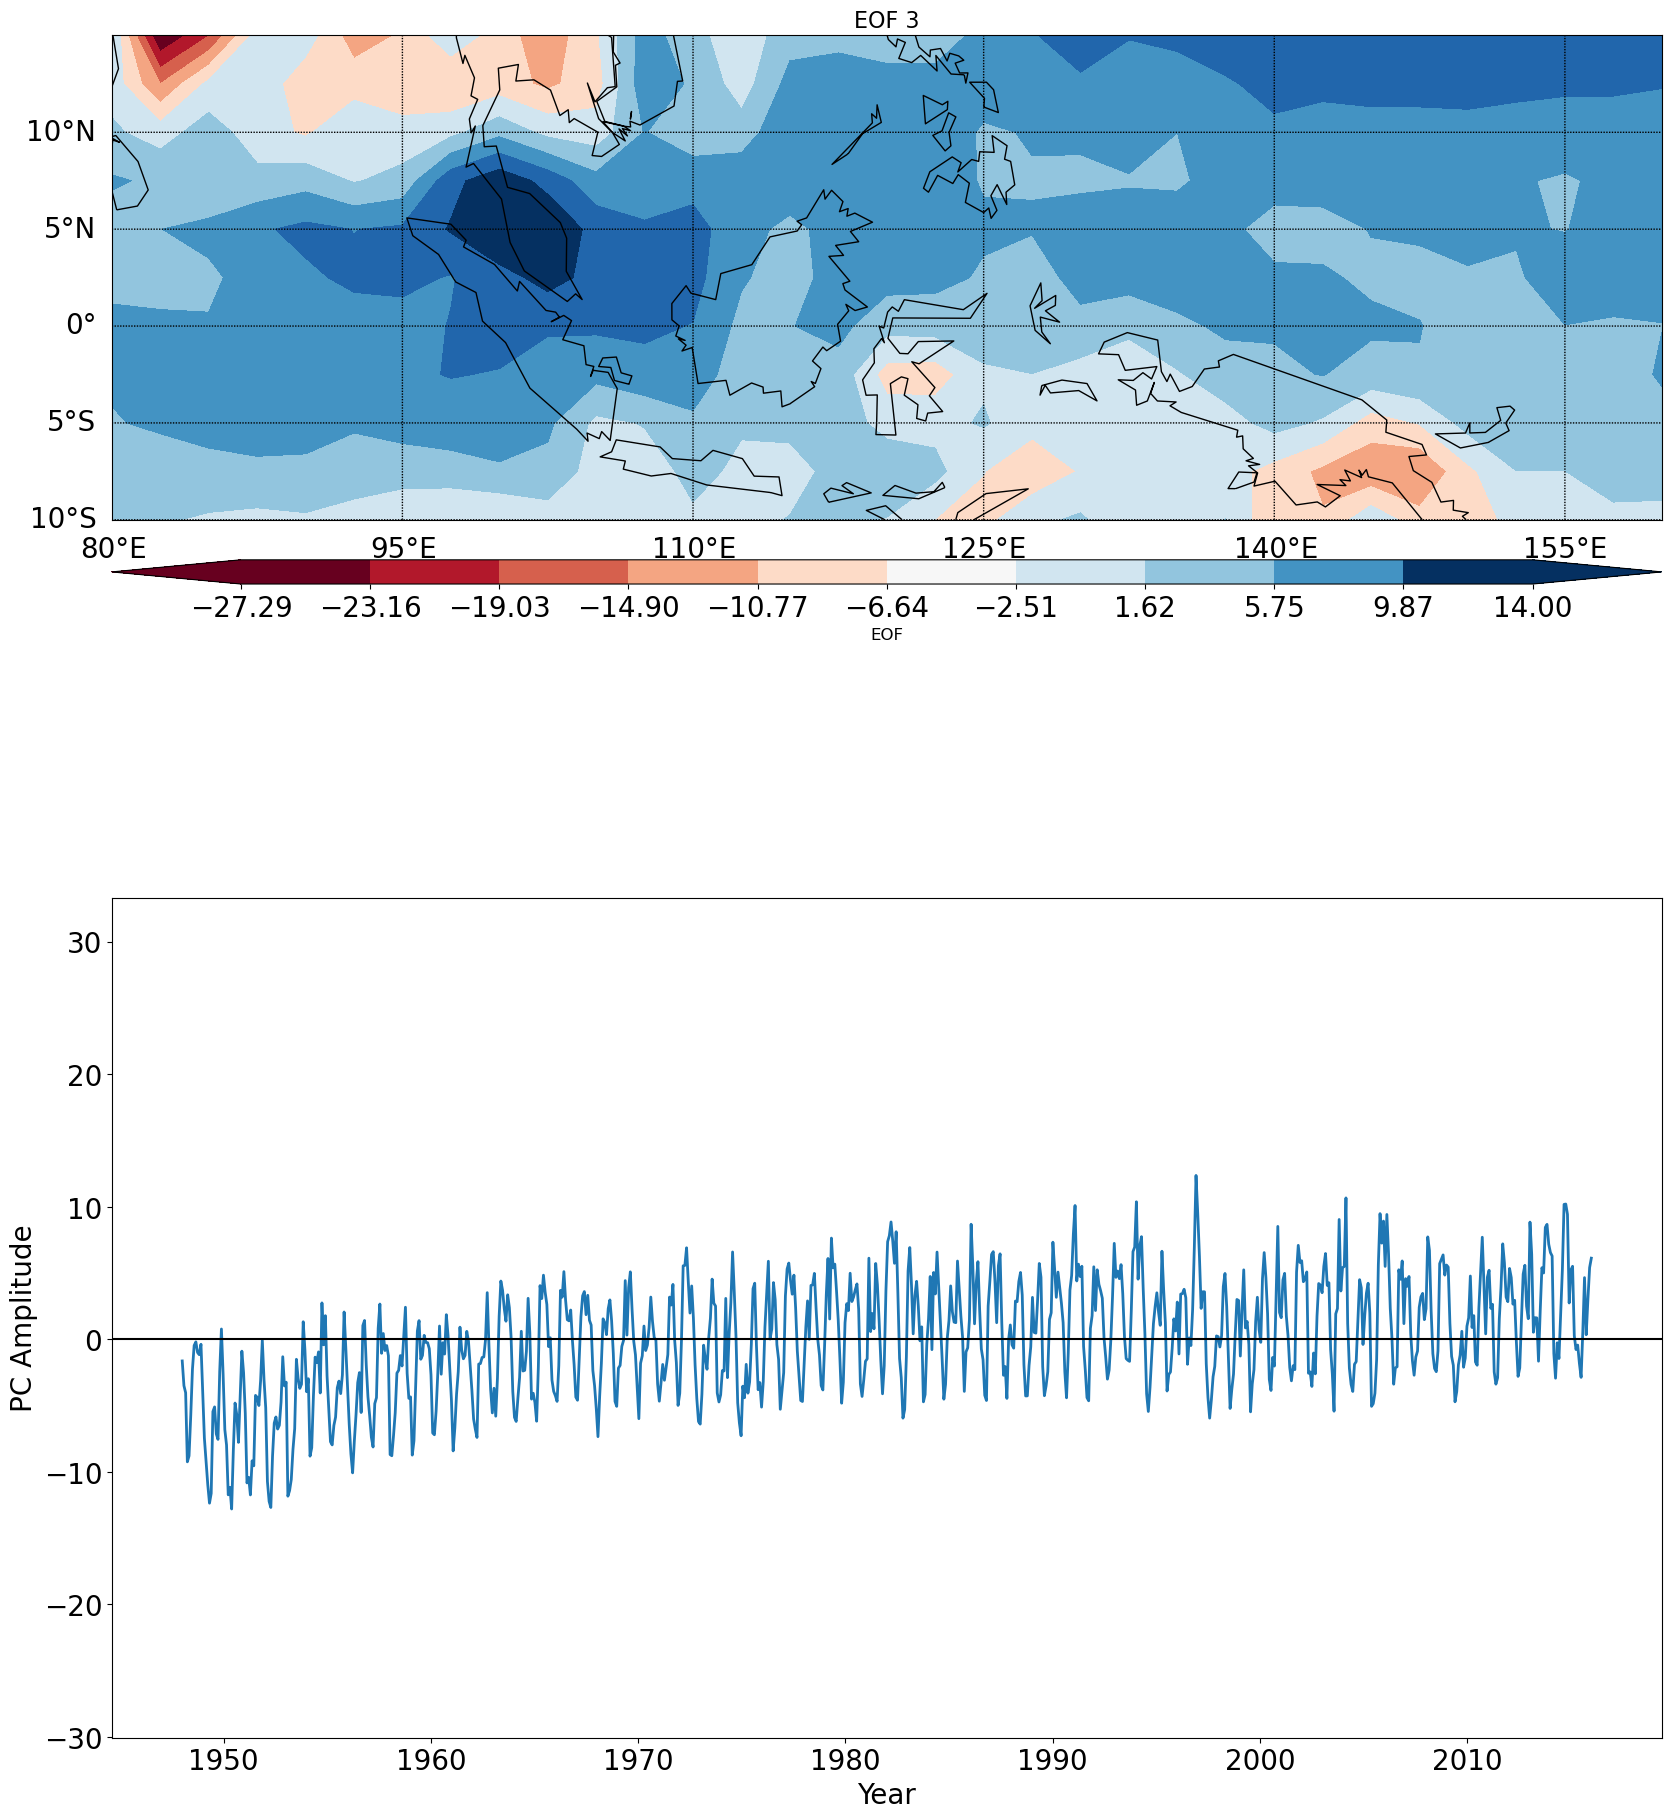

In [22]:
parallels = np.arange(min(lat),max(lat),5)
parallels =  [round(x,0) for x in parallels] 
meridians = np.arange(min(lon),max(lon),15)
meridians =  [round(x,0) for x in meridians] 

skala=100

for i in range(0,3):
    fig = plt.figure(figsize=(20,24))
    plt.subplot(211)
    
    sekmen=11
    clevs = np.linspace(np.min(eof1[i,:,:].squeeze()), np.max(eof1[i,:,:].squeeze()), sekmen)*skala
    m = Basemap(projection='cyl', llcrnrlon=min(lon), llcrnrlat=min(lat), urcrnrlon=max(lon), urcrnrlat=max(lat)) 
    x, y = m(*np.meshgrid(lon, lat))
    #clevs = np.linspace(-2.5, 2.5, sekmen)
    cmap = plt.get_cmap('RdBu', sekmen)
    
    cs = m.contourf(x,y,(eof1[i,:,:].squeeze())*skala, clevs, cmap=cmap)
    
    m.drawcoastlines()  
    m.drawparallels(parallels, labels=[1,0,0,0])
    m.drawmeridians(meridians, labels=[1,0,0,1])

    
    #cb = m.colorbar(cs, 'right', size='5%', pad='2%', extend='both')
    
    #bounds = [-1.0, -0.5, 0.5, 1.0]
    norm = mpl.colors.BoundaryNorm(clevs, cmap.N)
    cb =  m.colorbar(
        mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
        #cax=cax,
        extend='both',
        extendfrac='auto',
        ticks=clevs,
        spacing='uniform',
        location='bottom',
        shrink=0.2, pad=0.4
    )
    
    cb.set_label('EOF', fontsize=12)
    plt.title('EOF ' + str(i+1), fontsize=16)

    plt.subplot(212)
    days = np.linspace(int(start_TIME),int(stop_TIME),len(hgtx))
    plt.plot(days, pc1[:,i], linewidth=2)
    plt.axhline(0, color='k')
    plt.xlabel('Year')
    plt.ylabel('PC Amplitude')   
    plt.ylim(np.min(pc1.squeeze()), np.max(pc1.squeeze()))

In [25]:
n = 828
# Distance of sampel in month
Lx = 828
x = np.linspace(0,Lx,n)
# Preparation step
## Creates all the necessery frequencies
freqs = fftfreq(n)
# Hanya mengambil sinyal yang positif
mask = freqs > 0
## FFT and Power spectra calculation
#fft_vals = fft(wilA_mean.rr.values)#df_wilA['norm'].to_list())
#fft_vals2 = fft(wilB_mean.rr.values)#df_wilB['norm'].to_list())
#fft_vals3 = fft(wilC_mean.rr.values)#df_wilC['norm'].to_list())

fft_vals_pc1SHUM = fft(pc1[:,0].tolist())
# True Teoritical FFT
fft_teo_pc1SHUM = 2.0 * np.abs(fft_vals_pc1SHUM/n)

In [26]:
from scipy.stats.stats import pearsonr

C:\Users\User\AppData\Local\Temp\ipykernel_10292\4005289447.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [27]:
fft_teo_DMI= 2.0 * np.abs(fft_vals_DMI/n)
fft_teo_pc1SHUM = 2.0 * np.abs(fft_vals_pc1SHUM/n)
corr , _ = pearsonr(fft_teo_DMI, fft_teo_pc1SHUM)
corr , _

(0.15744907410108422, 5.309466819758893e-06)

In [28]:
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.157


In [30]:
n = 828
# Distance of sampel in month
Lx = 828
x = np.linspace(0,Lx,n)
# Preparation step
## Creates all the necessery frequencies
freqs = fftfreq(n)
# Hanya mengambil sinyal yang positif
mask = freqs > 0
## FFT and Power spectra calculation
#fft_vals = fft(wilA_mean.rr.values)#df_wilA['norm'].to_list())
#fft_vals2 = fft(wilB_mean.rr.values)#df_wilB['norm'].to_list())
#fft_vals3 = fft(wilC_mean.rr.values)#df_wilC['norm'].to_list())

fft_vals_pc2SHUM = fft(pc1[:,1].tolist())
# True Teoritical FFT
fft_teo_pc2SHUM = 2.0 * np.abs(fft_vals_pc2SHUM/n)

In [31]:
fft_teo_DMI= 2.0 * np.abs(fft_vals_DMI/n)
fft_teo_pc2SHUM = 2.0 * np.abs(fft_vals_pc2SHUM/n)
corr , _ = pearsonr(fft_teo_DMI, fft_teo_pc2SHUM)
corr , _
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.243


In [34]:
n = 828
# Distance of sampel in month
Lx = 828
x = np.linspace(0,Lx,n)
# Preparation step
## Creates all the necessery frequencies
freqs = fftfreq(n)
# Hanya mengambil sinyal yang positif
mask = freqs > 0
## FFT and Power spectra calculation
#fft_vals = fft(wilA_mean.rr.values)#df_wilA['norm'].to_list())
#fft_vals2 = fft(wilB_mean.rr.values)#df_wilB['norm'].to_list())
#fft_vals3 = fft(wilC_mean.rr.values)#df_wilC['norm'].to_list())

fft_vals_pc3SHUM = fft(pc1[:,2].tolist())
# True Teoritical FFT
fft_teo_pc3SHUM = 2.0 * np.abs(fft_vals_pc3SHUM/n)

In [35]:
fft_teo_DMI= 2.0 * np.abs(fft_vals_DMI/n)
fft_teo_pc3SHUM = 2.0 * np.abs(fft_vals_pc3SHUM/n)
corr , _ = pearsonr(fft_teo_DMI, fft_teo_pc3SHUM)
corr , _
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.213
